In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('telecom_customer_churn.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


# 전처리

In [5]:
# offer : None
data['Offer'].fillna(value='None', inplace=True)

# Avg Monthly Long Distance Charges : 0
data['Avg Monthly Long Distance Charges'].fillna(value=0, inplace=True)

# Multiple Lines : No Phone Service
data['Multiple Lines'].fillna(value='No Phone Service', inplace=True)

# Avg Monthly GB Download : 0
data['Avg Monthly GB Download'].fillna(value=0, inplace=True)

# Q, S~Z : No Internet Service
fillc1 = ['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
                   'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']
data[fillc1] = data[fillc1].fillna('No Internet Service')

# Churn
fillc2 = ['Churn Category', 'Churn Reason']
data[fillc2] = data[fillc2].fillna('None')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

# EDA

In [7]:
data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,22.958954,20.515405,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,15.448113,20.418940,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,0.000000,0.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,9.210000,3.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,22.890000,17.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,36.395000,27.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [8]:
data.describe(include='object')

,Customer ID,Gender,Married,City,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status,Churn Category,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,1106,6,2,3,2,4,3,3,3,3,3,3,3,3,3,2,3,3,6,21
top,0002-ORFBO,Male,No,Los Angeles,None,Yes,No,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Stayed,None,None
freq,1,3555,3641,293,3877,6361,3390,5517,3035,3498,3088,3095,3473,2810,2785,3029,4745,3610,4171,3909,4720,5174,5174


## Numeric Columns

In [9]:
num_data = data[['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Monthly Charge', 'Total Charges', 'Total Long Distance Charges', 'Total Revenue']]

num_data.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue
0,37,0,2,9,65.6,593.30,381.51,974.81
1,46,0,0,9,-4.0,542.40,96.21,610.28
2,50,0,0,4,73.9,280.85,134.60,415.45
3,78,0,1,13,98.0,1237.85,361.66,1599.51
4,75,0,3,3,83.9,267.40,22.14,289.54


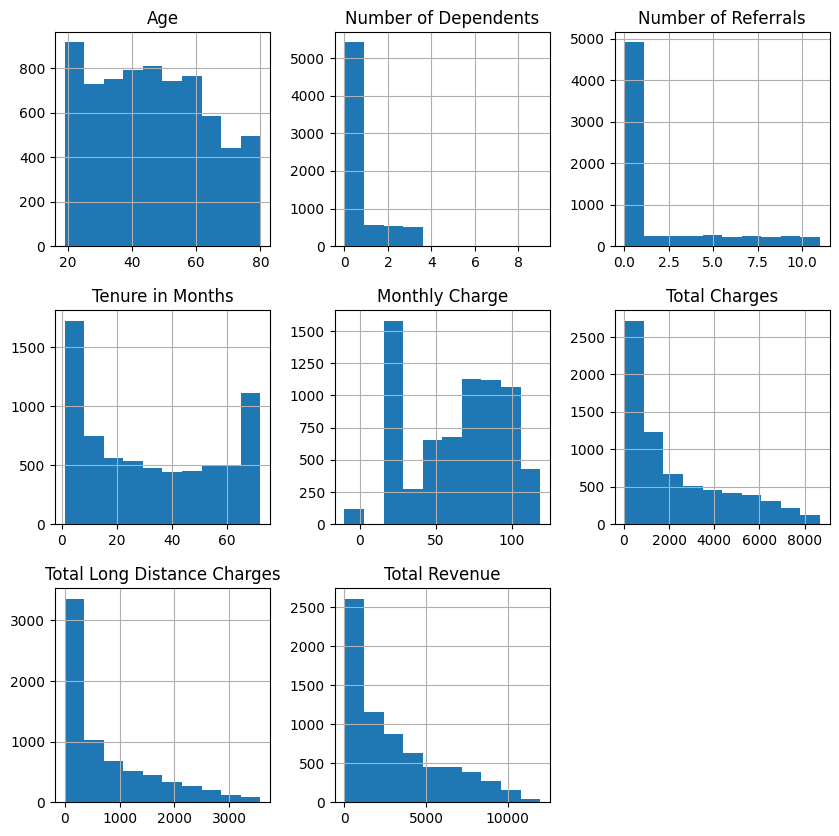

In [10]:
num_data.hist(figsize=(10, 10))
plt.show()

## Object Columns

In [11]:
ob_data = data[['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']]

ob_data.head()

,Gender,Married,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
0,Female,Yes,None,Yes,No,Yes,Cable,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card
1,Male,No,None,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card
2,Male,No,Offer E,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
3,Male,Yes,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal
4,Female,Yes,None,Yes,No,Yes,Fiber Optic,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card


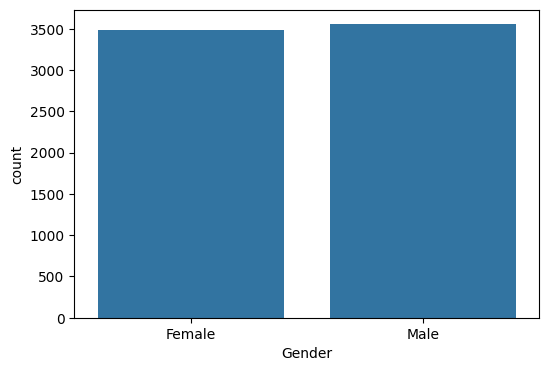

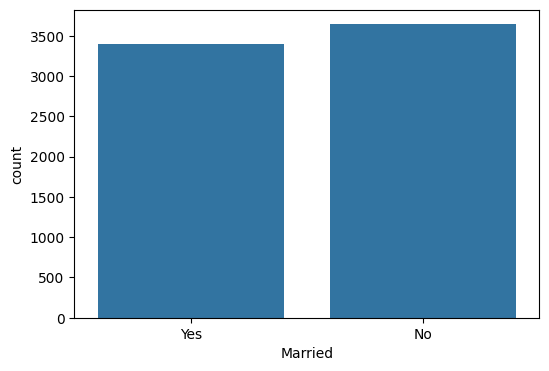

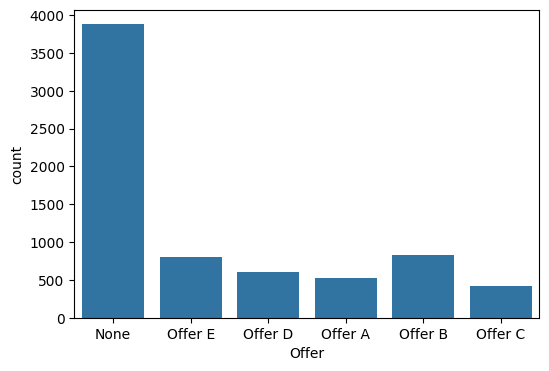

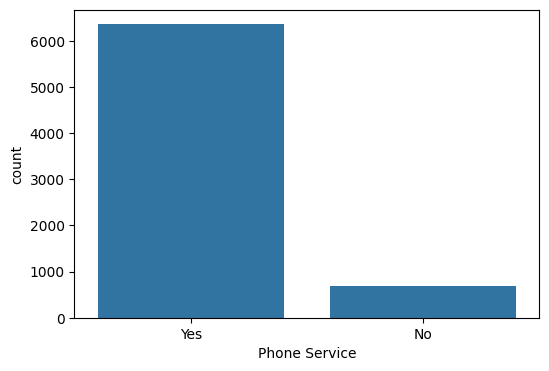

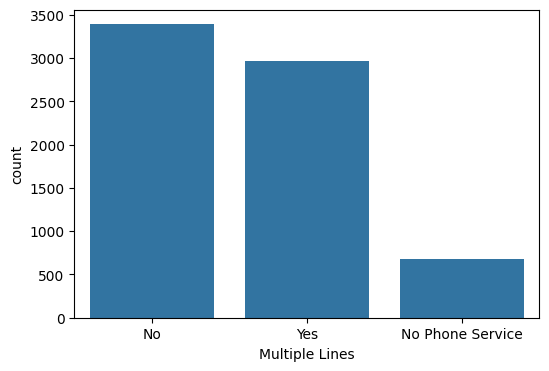

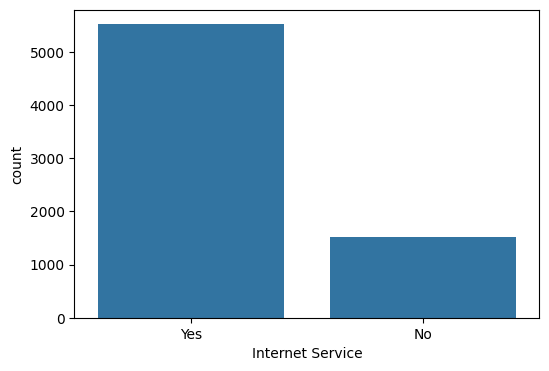

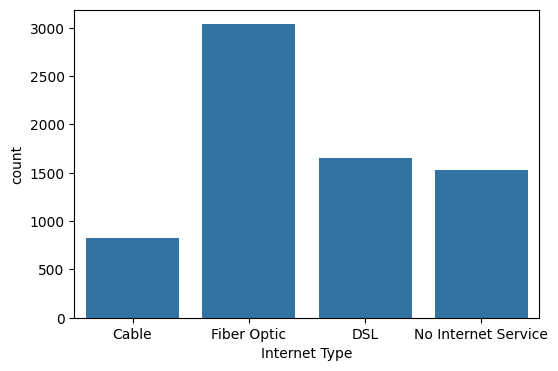

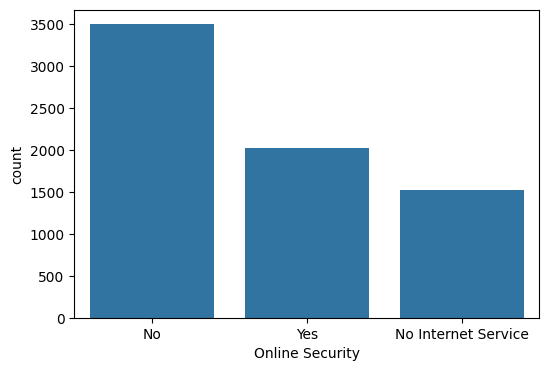

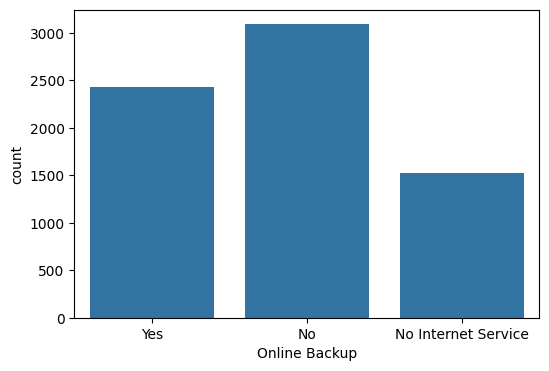

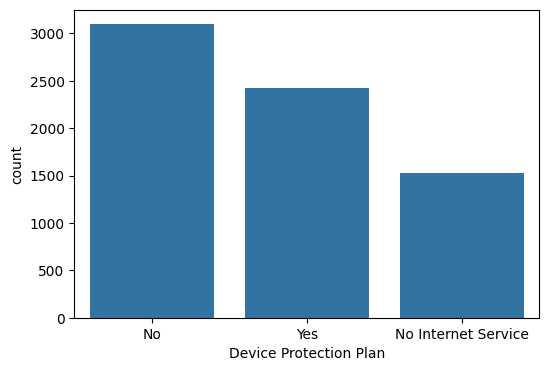

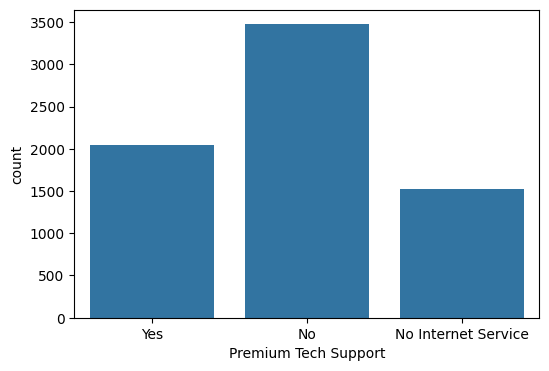

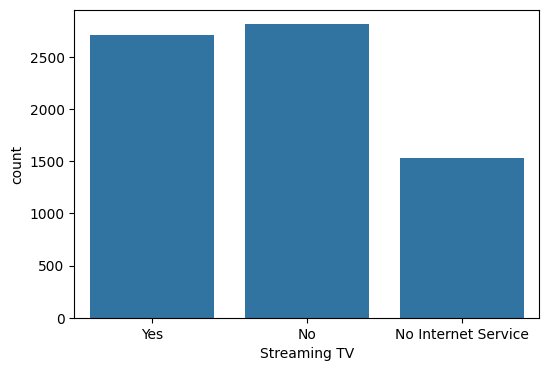

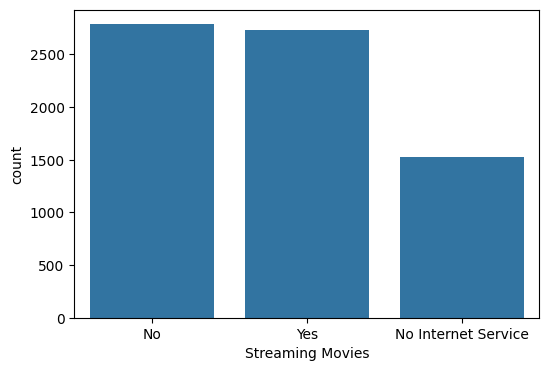

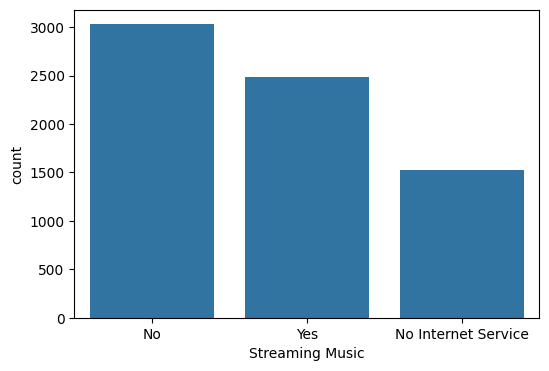

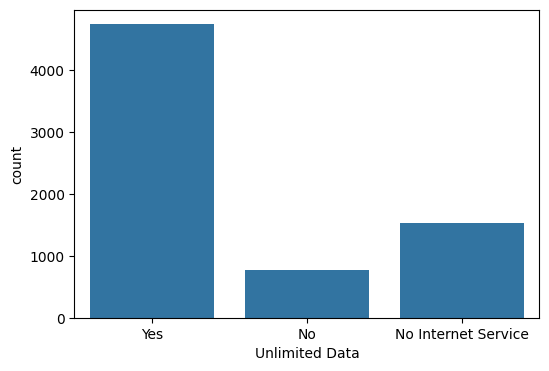

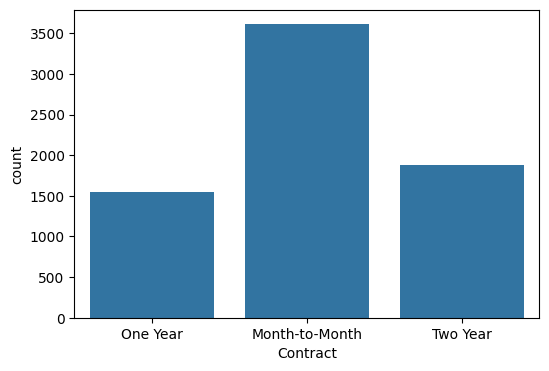

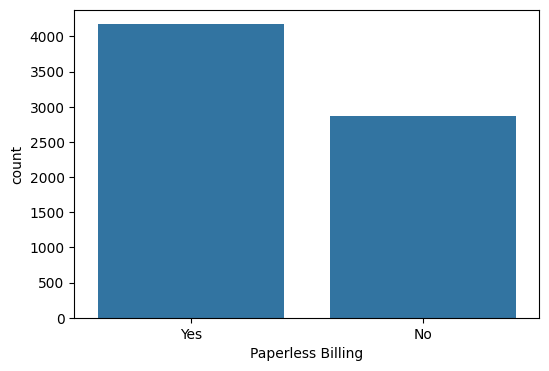

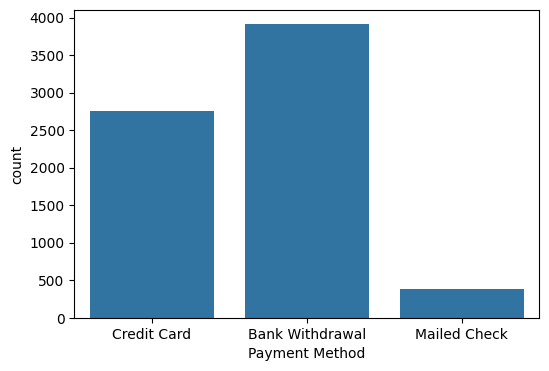

In [12]:
for c in ob_data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=c)
    plt.show()

## Churn

In [14]:
# Joined 제거
data = data.drop(data[data['Customer Status'] == 'Joined'].index)

data['Customer Status'].head()

0     Stayed
1     Stayed
2    Churned
3    Churned
4    Churned
Name: Customer Status, dtype: object

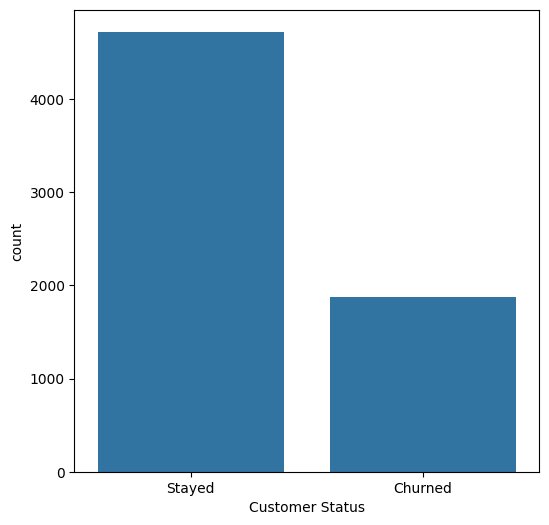

In [15]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='Customer Status')
plt.show()

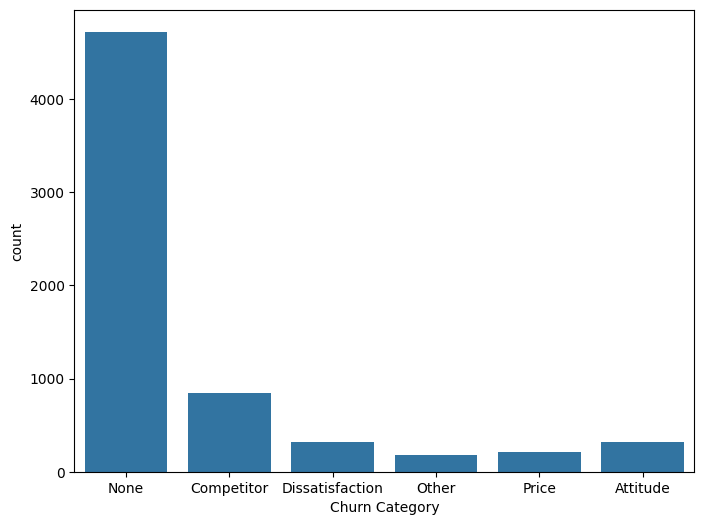

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Churn Category')
plt.show()

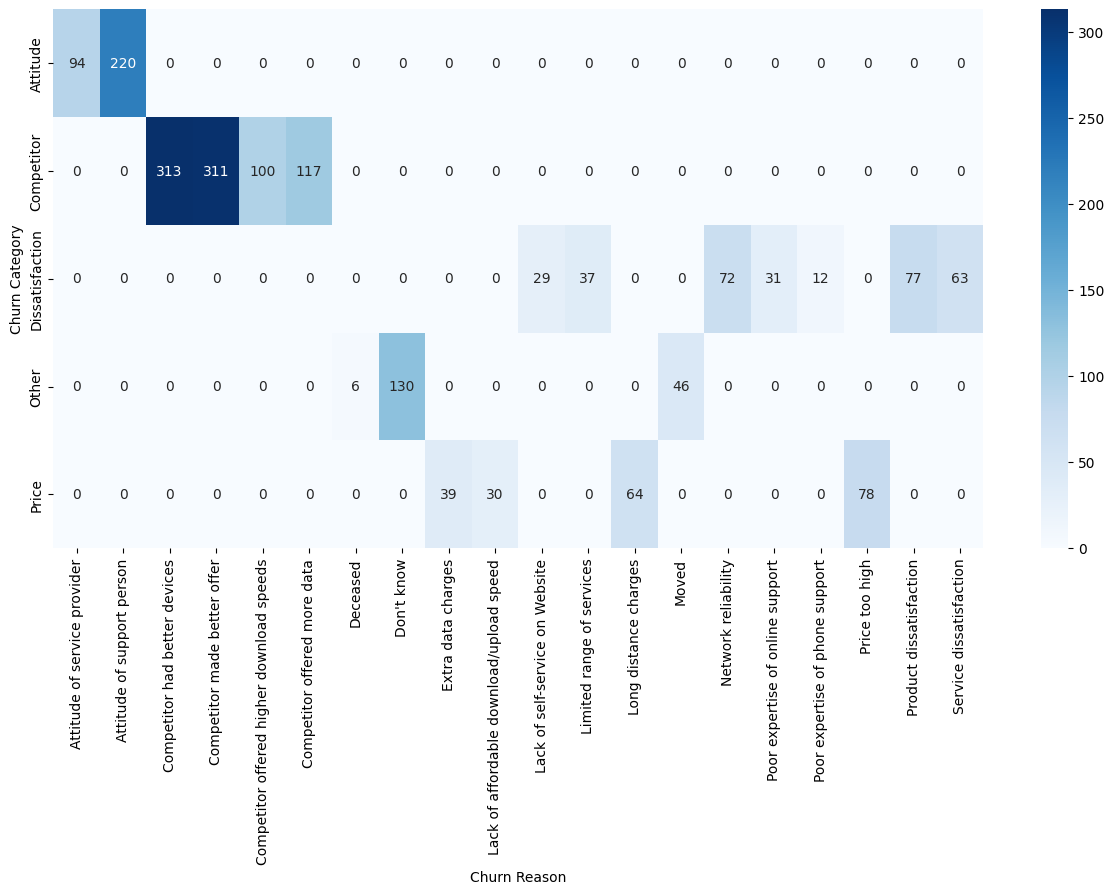

In [18]:
chdata = data[['Churn Category', 'Churn Reason']]
chdata = chdata[(chdata['Churn Category'] != 'None') & (chdata['Churn Reason'] != 'None')]

cross = pd.crosstab(chdata['Churn Category'], chdata['Churn Reason'])

plt.figure(figsize=(15, 7))
sns.heatmap(cross, annot=True, cmap='Blues', fmt='d')
plt.show()

In [19]:
# Churn Category, Churn Reason 제거
dropc1 = ['Churn Category', 'Churn Reason']
data = data.drop(dropc2, axis=1)

data.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

# Encoding

In [20]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ohenc = OneHotEncoder()
lbenc = LabelEncoder()

In [21]:
data['Customer Status'] = lbenc.fit_transform(data['Customer Status'])

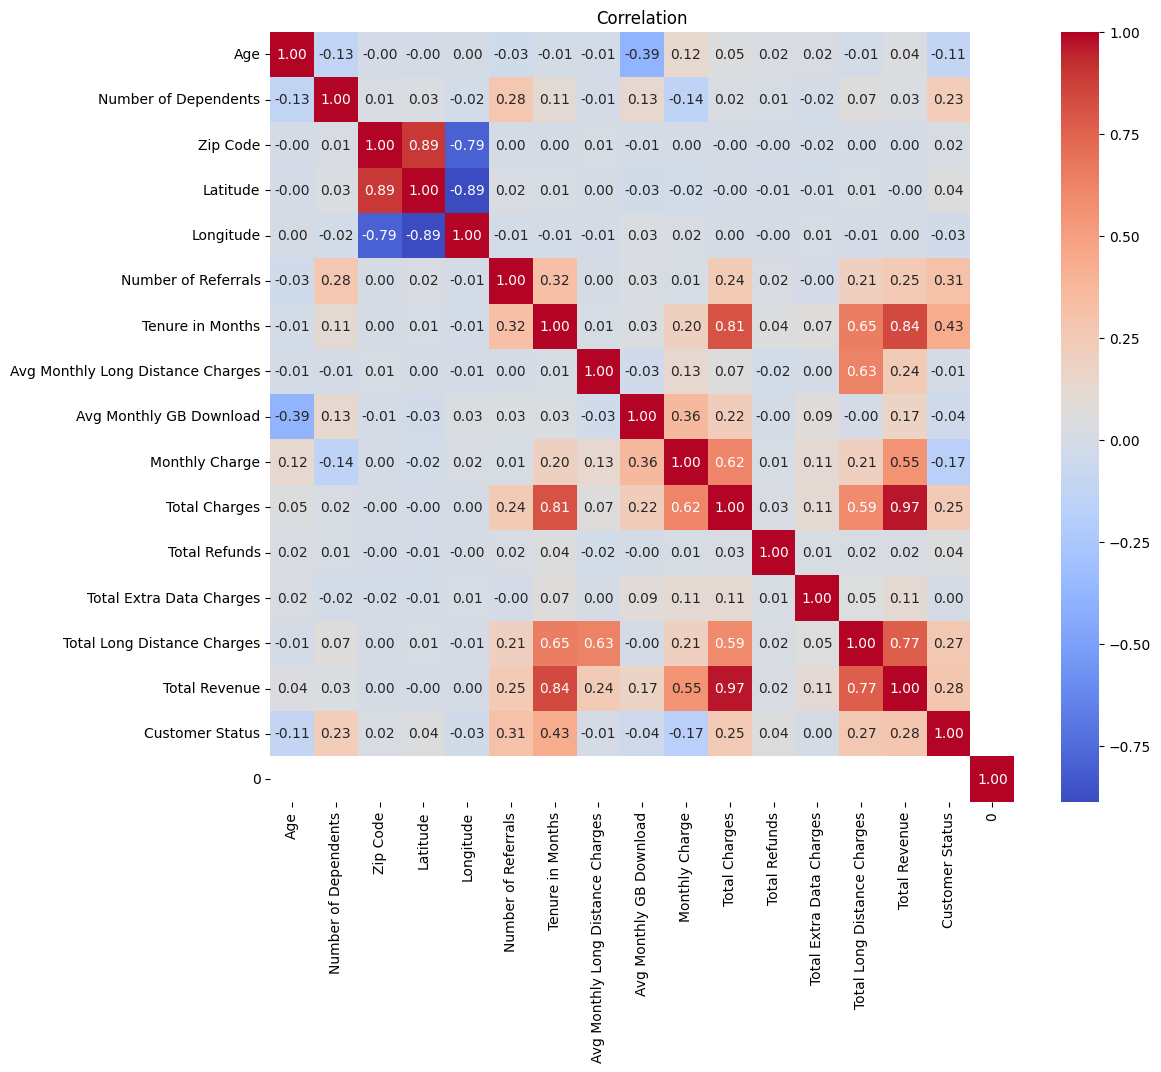

In [23]:
n = data.select_dtypes(['int', 'float'])
n = pd.concat([n, data['Customer Status']])

plt.figure(figsize=(12, 10))
sns.heatmap(n.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation')
plt.show()

In [24]:
# 상관관계가 0.1 이하인 컬럼들 제거
dropc2 = ['Zip Code', 'Latitude', 'Longitude', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Total Refunds', 'Total Extra Data Charges']
data = data.drop(dropc2, axis=1)

data.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status'],
      dtype='object')

In [25]:
# Customer ID, City는 종속 변수에 영향이 없어 보이므로 제거
dropc3 = ['Customer ID', 'City']
data = data.drop(dropc3, axis=1)

data.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status'],
      dtype='object')

In [26]:
# 전체 인코딩
for c in data.select_dtypes(include=['object']).columns:
  if len(data[c].unique()) == 2:
    data[c] = lbenc.fit_transform(data[c])
  else:
    data = pd.get_dummies(data, columns=[c], dtype=int)

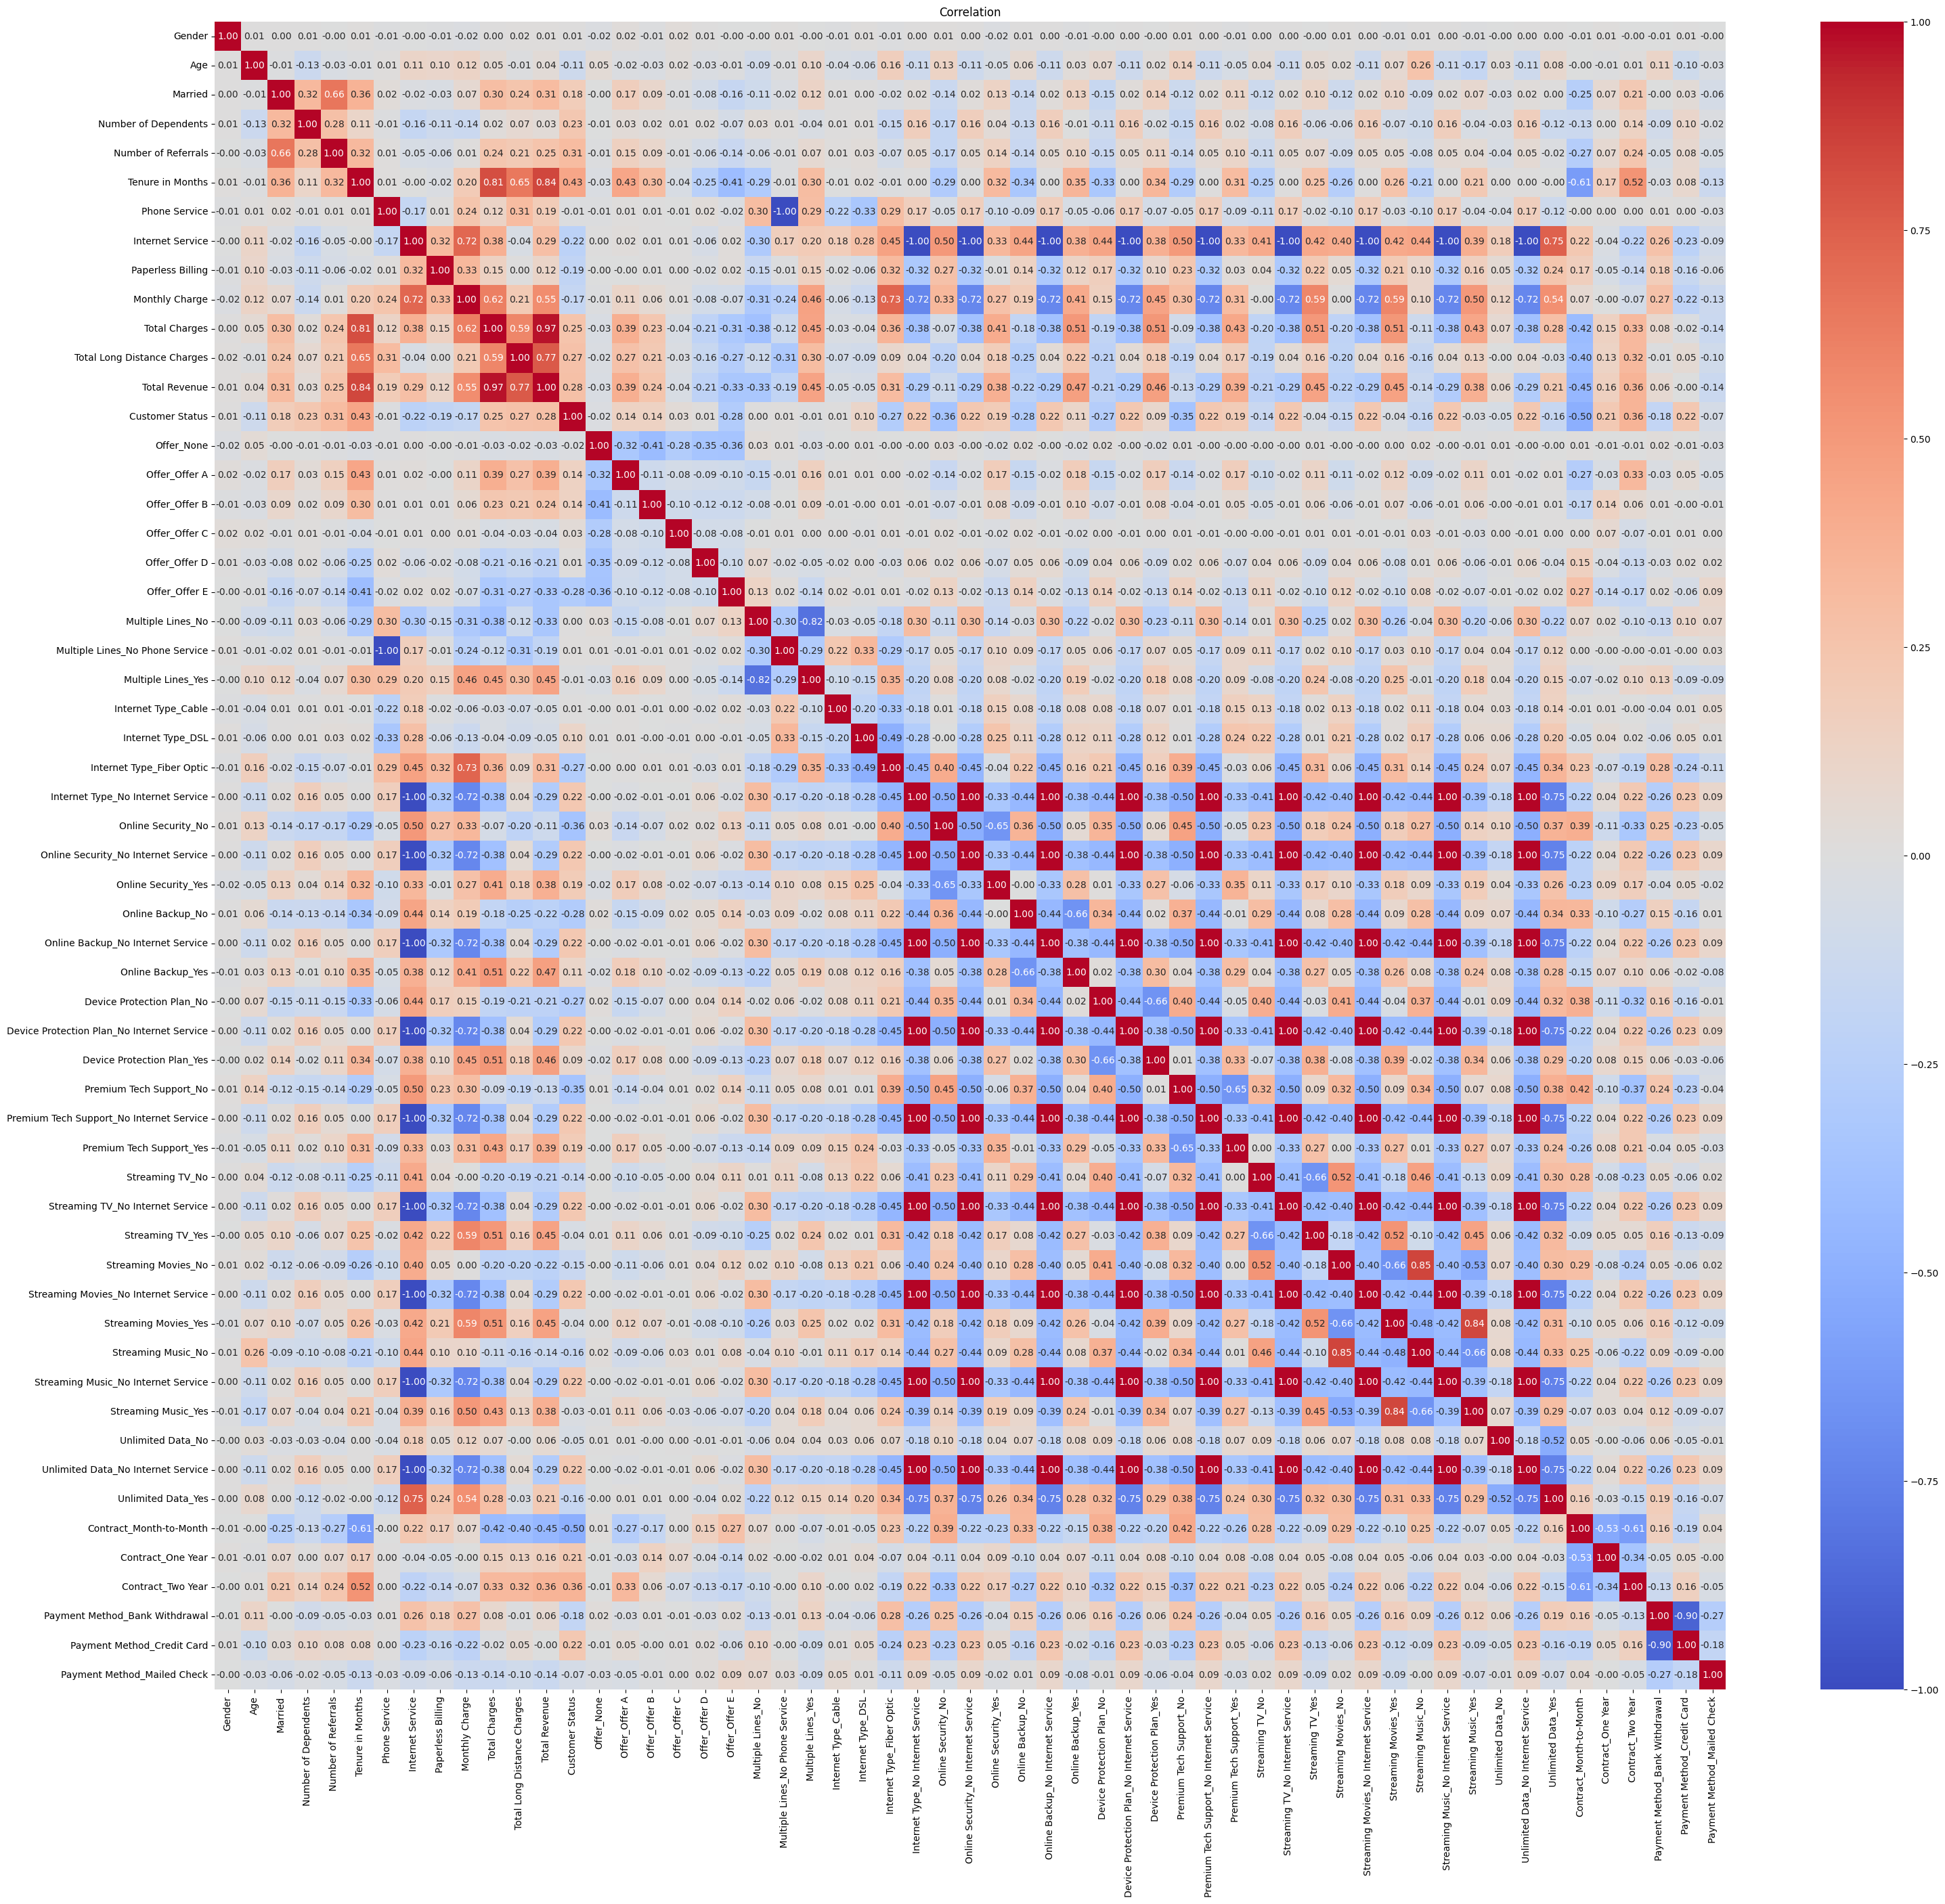

In [27]:
# 전체 상관관계
plt.figure(figsize=(36, 32))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation')
plt.show()

In [28]:
# 상관관계가 0.1 이하인 컬럼들 삭제
dropc4 = ['Offer_None', 'Offer_Offer C', 'Offer_Offer D',
          'Multiple Lines_No', 'Multiple Lines_Yes', 'Multiple Lines_No Phone Service',
          'Internet Type_Cable',
          'Device Protection Plan_Yes',
          'Streaming TV_Yes',
          'Streaming Movies_Yes',
          'Streaming Music_Yes',
          'Unlimited Data_No',
          'Payment Method_Mailed Check',
          'Gender',
          'Phone Service']
data = data.drop(dropc4, axis=1)

data.columns

Index(['Age', 'Married', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Internet Service', 'Paperless Billing',
       'Monthly Charge', 'Total Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Offer_Offer A', 'Offer_Offer B',
       'Offer_Offer E', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_No Internet Service', 'Online Security_No',
       'Online Security_No Internet Service', 'Online Security_Yes',
       'Online Backup_No', 'Online Backup_No Internet Service',
       'Online Backup_Yes', 'Device Protection Plan_No',
       'Device Protection Plan_No Internet Service', 'Premium Tech Support_No',
       'Premium Tech Support_No Internet Service', 'Premium Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_No Internet Service',
       'Streaming Movies_No', 'Streaming Movies_No Internet Service',
       'Streaming Music_No', 'Streaming Music_No Internet Service',
       'Unlimited Dat

# Modeling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [31]:
X = data.drop('Customer Status', axis=1)
y = data['Customer Status']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, accuracy_score

### MinMax

In [34]:
mm = MinMaxScaler()
mm_xtrain = mm.fit_transform(X_train)
mm_xtest = mm.transform(X_test)

#### Random Forest

In [43]:
mmrf = RandomForestClassifier(random_state=42)

In [44]:
mmrf.fit(mm_xtrain, y_train)

RandomForestClassifier(random_state=42)

In [45]:
mmpred_train = mmrf.predict(mm_xtrain)
mmpred_test = mmrf.predict(mm_xtest)

mmtrac = accuracy_score(y_train, mmpred_train)
mmteac = accuracy_score(y_test, mmpred_test)

print('Train Accuracy: ', mmtrac)
print('Test Accuracy: ', mmteac)

Train Accuracy:  1.0
Test Accuracy:  0.8687405159332322


In [82]:
print(classification_report(y_test, mmpred_test, target_names=['churned', 'stayed']))

              precision    recall  f1-score   support

     churned       0.84      0.68      0.75       383
      stayed       0.88      0.95      0.91       935

    accuracy                           0.87      1318
   macro avg       0.86      0.81      0.83      1318
weighted avg       0.87      0.87      0.86      1318



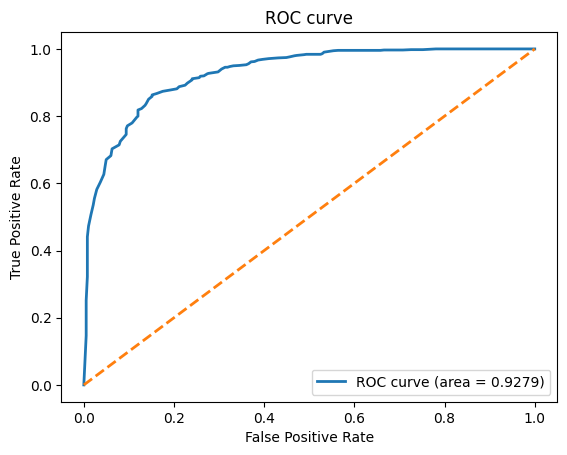

In [83]:
mmrf_proba = mmrf.predict_proba(mm_xtest)[:, 1]
fpr_r1, tpr_r1, thresholds_r1 = roc_curve(y_test, mmrf_proba)
roc_auc_r1 = roc_auc_score(y_test, mmrf_proba)

plt.figure()
plt.plot(fpr_r1, tpr_r1, lw=2, label='ROC curve (area = %0.4f)' % roc_auc_r1)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

#### SVM

In [73]:
mms = SVC(probability=True, random_state=42)

In [74]:
mms.fit(mm_xtrain, y_train)

SVC(probability=True, random_state=42)

In [76]:
mmspred_train = mms.predict(mm_xtrain)
mmspred_test = mms.predict(mm_xtest)

mmstrac = accuracy_score(y_train, mmspred_train)
mmsteac = accuracy_score(y_test, mmspred_test)

print('Train Accuracy: ', mmstrac)
print('Test Accuracy: ', mmsteac)

Train Accuracy:  0.8605577689243028
Test Accuracy:  0.849772382397572


In [84]:
print(classification_report(y_test, mmspred_test, target_names=['churned', 'stayed']))

              precision    recall  f1-score   support

     churned       0.78      0.67      0.72       383
      stayed       0.87      0.92      0.90       935

    accuracy                           0.85      1318
   macro avg       0.83      0.80      0.81      1318
weighted avg       0.85      0.85      0.85      1318



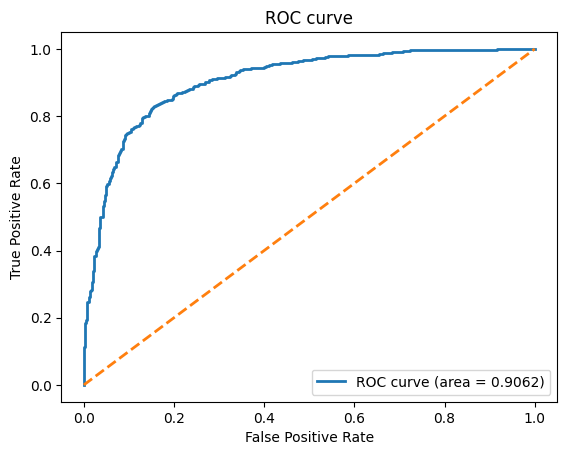

In [85]:
mms_proba = mms.predict_proba(mm_xtest)[:, 1]
fpr_s1, tpr_s1, thresholds_s1 = roc_curve(y_test, mms_proba)
roc_auc_s1 = roc_auc_score(y_test, mms_proba)

plt.figure()
plt.plot(fpr_s1, tpr_s1, lw=2, label='ROC curve (area = %0.4f)' % roc_auc_s1)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

#### Naive Bayes

In [77]:
mmnb = GaussianNB()

In [78]:
mmnb.fit(mm_xtrain, y_train)

GaussianNB()

In [79]:
mmnpred_train = mmnb.predict(mm_xtrain)
mmnpred_test = mmnb.predict(mm_xtest)

mmntrac = accuracy_score(y_train, mmnpred_train)
mmnteac = accuracy_score(y_test, mmnpred_test)

print('Train Accuracy: ', mmntrac)
print('Test Accuracy: ', mmnteac)

Train Accuracy:  0.7662682602921647
Test Accuracy:  0.7693474962063733


### Standard

In [35]:
sd = StandardScaler()
sd_xtrain = sd.fit_transform(X_train)
sd_xtest = sd.transform(X_test)

#### Random Forest

In [46]:
sdrf = RandomForestClassifier(random_state=42)

In [47]:
sdrf.fit(sd_xtrain, y_train)

RandomForestClassifier(random_state=42)

In [49]:
sdpred_train = sdrf.predict(sd_xtrain)
sdpred_test = sdrf.predict(sd_xtest)

sdtrac = accuracy_score(y_train, sdpred_train)
sdteac = accuracy_score(y_test, sdpred_test)

print('Train Accuracy: ', sdtrac)
print('Test Accuracy: ', sdteac)

Train Accuracy:  1.0
Test Accuracy:  0.8687405159332322


#### SVM

In [66]:
sds = SVC(probability=True, random_state=42)

In [67]:
sds.fit(sd_xtrain, y_train)

SVC(probability=True, random_state=42)

In [68]:
sdspred_train = sds.predict(sd_xtrain)
sdspred_test = sds.predict(sd_xtest)

sdstrac = accuracy_score(y_train, sdspred_train)
sdsteac = accuracy_score(y_test, sdspred_test)

print('Train Accuracy: ', sdstrac)
print('Test Accuracy: ', sdsteac)

Train Accuracy:  0.8673875924871941
Test Accuracy:  0.8581183611532626


#### Naive Bayes

In [69]:
sdnb = GaussianNB()

In [70]:
sdnb.fit(sd_xtrain, y_train)

GaussianNB()

In [72]:
sdnpred_train = sdnb.predict(sd_xtrain)
sdnpred_test = sdnb.predict(sd_xtest)

sdntrac = accuracy_score(y_train, sdnpred_train)
sdnteac = accuracy_score(y_test, sdnpred_test)

print('Train Accuracy: ', sdntrac)
print('Test Accuracy: ', sdnteac)

Train Accuracy:  0.7662682602921647
Test Accuracy:  0.7693474962063733


### Robust

In [36]:
rb = RobustScaler()
rb_xtrain = rb.fit_transform(X_train)
rb_xtest = rb.transform(X_test)

#### Random Forest

In [50]:
rbrf = RandomForestClassifier(random_state=42)

In [51]:
rbrf.fit(rb_xtrain, y_train)

RandomForestClassifier(random_state=42)

In [52]:
rbpred_train = rbrf.predict(rb_xtrain)
rbpred_test = rbrf.predict(rb_xtest)

rbtrac = accuracy_score(y_train, rbpred_train)
rbteac = accuracy_score(y_test, rbpred_test)

print('Train Accuracy: ', rbtrac)
print('Test Accuracy: ', rbteac)

Train Accuracy:  1.0
Test Accuracy:  0.8694992412746586


#### SVM

In [57]:
rbs = SVC(random_state=42)

In [58]:
rbs.fit(rb_xtrain, y_train)

SVC(random_state=42)

In [59]:
rbspred_train = rbs.predict(rb_xtrain)
rbspred_test = rbs.predict(rb_xtest)

rbstrac = accuracy_score(y_train, rbspred_train)
rbsteac = accuracy_score(y_test, rbspred_test)

print('Train Accuracy: ', rbstrac)
print('Test Accuracy: ', rbsteac)

Train Accuracy:  0.8687156137355341
Test Accuracy:  0.8558421851289834


#### Naive Bayes

In [63]:
rbnb = GaussianNB()

In [64]:
rbnb.fit(rb_xtrain, y_train)

GaussianNB()

In [65]:
rbnpred_train = rbnb.predict(rb_xtrain)
rbnpred_test = rbnb.predict(rb_xtest)

rbntrac = accuracy_score(y_train, rbnpred_train)
rbnteac = accuracy_score(y_test, rbnpred_test)

print('Train Accuracy: ', rbntrac)
print('Test Accuracy: ', rbnteac)

Train Accuracy:  0.7662682602921647
Test Accuracy:  0.7693474962063733
